In [1]:
import rdflib
# import ontospy
import networkx as nx
from networkx import Graph as NXGraph
import matplotlib.pyplot as plt
import statistics
import collections
from rdflib import OWL, RDFS
import pandas as pd
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph, rdflib_to_networkx_digraph

In [2]:
#!ontospy scan "http://eiopa.europa.eu/xbrl/s2md/dict/met"

In [3]:
g = rdflib.Graph()
f = open("qrs_240_instance.ttl", encoding = "utf-8")
string = f.read()
g.parse(data=string, format='turtle')
f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'qrs_240_instance.ttl'

In [195]:
for subj, pred, obj in g:
    # check if there is at least one triple in the Graph
    if (subj, pred, obj) not in g:
        raise Exception("It better be!")

# print the number of "triples" in the Graph
print("graph has {} statements.".format(len(g)))

# print out the entire Graph in the RDF Turtle format
# print(g.serialize(format="turtle").decode("utf-8"))

graph has 13123 statements.


In [199]:
q = rdflib.plugins.sparql.prepareQuery(
    """PREFIX rdfsyntax: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
       PREFIX xbrl: <http://www.xbrl.org/2003/>
       PREFIX xbrl2: <http://xbrl.org/2006/>
       SELECT DISTINCT ?fact ?dim2
       WHERE {
          ?scenario xbrl2:xbrldiexplicitMember ?dim.
          ?scenario xbrl2:xbrldiexplicitMember ?dim2.
          ?context xbrl:instancescenario ?scenario.
          ?fact xbrl:instancecontext ?context.
       }""")

results = dict()
for row in g.query(q):
    if row[0] not in results.keys():
        results[row[0]] = [row[1]]
    else:
        results[row[0]].append(row[1])
# for item in qres:
#     print(item)

In [201]:
results[rdflib.term.BNode('f2f6e749a5ba846c3a7e459bd0f0610cdb806')]

[rdflib.term.Literal('Health SLT and annuities stemming from non-life insurance contracts and relating to health insurance obligations', datatype=rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#XMLLiteral')),
 rdflib.term.Literal('s2c_DI:x5', datatype=rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#XMLLiteral')),
 rdflib.term.Literal('Adjustment of valuation of assets held for unit-linked funds4', datatype=rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#XMLLiteral')),
 rdflib.term.Literal('Annuities stemming from non-life insurance contracts and relating to health insurance obligations9', datatype=rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#XMLLiteral'))]

In [197]:
d = rdflib.term.Literal('Unit-linked or index-linked', 
                        datatype=rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#XMLLiteral'))

In [198]:
for row in g.query(q, initBindings={'dim': d}):
    print(row)

(rdflib.term.BNode('f2f6e749a5ba846c3a7e459bd0f0610cdb296'), rdflib.term.Literal('Unit-linked or index-linked', datatype=rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#XMLLiteral')))
(rdflib.term.BNode('f2f6e749a5ba846c3a7e459bd0f0610cdb296'), rdflib.term.Literal('Calculated as a whole', datatype=rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#XMLLiteral')))
(rdflib.term.BNode('f2f6e749a5ba846c3a7e459bd0f0610cdb296'), rdflib.term.Literal('Solvency II', datatype=rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#XMLLiteral')))
(rdflib.term.BNode('f2f6e749a5ba846c3a7e459bd0f0610cdb279'), rdflib.term.Literal('Unit-linked or index-linked', datatype=rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#XMLLiteral')))
(rdflib.term.BNode('f2f6e749a5ba846c3a7e459bd0f0610cdb279'), rdflib.term.Literal('Direct Business', datatype=rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#XMLLiteral')))
(rdflib.term.BNode('f2f6e749a5ba846c3a7

In [140]:
g = rdflib.Graph()
f = open("t.ttl", encoding = "utf-8")
string = f.read()
for key in labels:
    string = string.replace(key, labels[key])
g.parse(data=string, format='turtle')
f.close()

In [141]:
def transform_s(s):
    return rdflib.BNode(str(s))

nxgraph = nx.Graph()
edge_attrs = lambda s, p, o: {'triples': [(s, p, o)]}
calc_weights = True
edge_labels = {}
for s, p, o in g:
#     if str(p) == "http://www.xbrl.org/2003/instancescenario":
        
    ts = transform_s(s)
#     ts, to = transform_s(s), transform_o(o)  # apply possible transformations
    data = nxgraph.get_edge_data(ts, o)
    if data is None or isinstance(nxgraph, nx.MultiDiGraph):
        # no edge yet, set defaults
        data = edge_attrs(ts, p, o)
        if calc_weights:
            data['weight'] = 1
        nxgraph.add_edge(ts, o, **data)
        if "#" in str(p):
            edge_labels[ts,o] = p.split("#")[-1]
        else:
            edge_labels[ts,o] = p.split("/")[-1].replace("instance", "").replace("XLink", "").replace("xbrldiexplicit", "")
    else:
        # already have an edge, just update attributes
        if calc_weights:
            data['weight'] += 1
        if 'triples' in data:
            d = edge_attrs(ts, p, o)
            data['triples'].extend(d['triples'])

# G = rdflib_to_networkx_digraph(g)
print("networkx Graph loaded successfully with length {}".format(len(nxgraph)))

networkx Graph loaded successfully with length 21


In [149]:
node_labels = {}
for node in nxgraph.nodes:
    if not isinstance(node, rdflib.term.BNode):
        dimension = str(node)
        if str(node) in labels.values():
            node_labels[node] = str(node).replace(" ", "\n")[0:30]
        else:
            node_labels[node] = str(node).split("/")[-1].replace("instance", "")

In [150]:
# import hvplot.networkx as hvnx
# import holoviews as hv
# from bokeh.models import HoverTool
# hv.extension('bokeh')

Visualizing the graph:


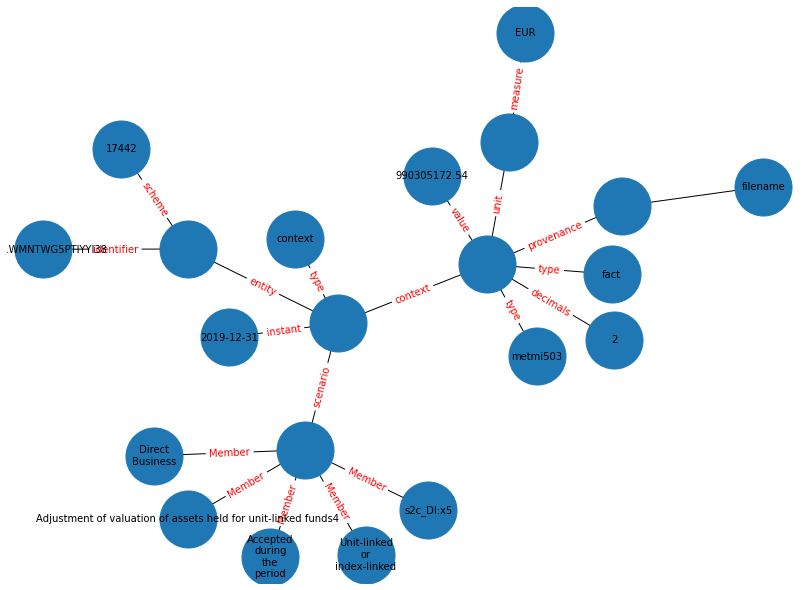

<Figure size 432x288 with 0 Axes>

In [151]:
df = pd.DataFrame(index=nxgraph.nodes(), columns=nxgraph.nodes())
for row, data in nx.shortest_path_length(nxgraph):
    for col, dist in data.items():
        df.loc[row,col] = dist

df = df.fillna(df.max().max())

pos = nx.kamada_kawai_layout(nxgraph, dist=df.to_dict())

# Plot
print("Visualizing the graph:")

plt.figure(1, figsize = (11, 8)) 

nx.draw(nxgraph, 
        pos, 
        edge_color = 'black', 
        with_labels = False, 
        node_size = 3250, 
        alpha= 1)
nx.draw_networkx_edge_labels(nxgraph, pos = pos, edge_labels = edge_labels, font_color='red', font_size = 10)
nx.draw_networkx_labels(nxgraph, pos, labels = node_labels, font_size = 10)
plt.show()
plt.savefig('plot.png')
# hvnx.draw(nxgraph, pos, node_color='lightgray').opts(tools=[HoverTool(tooltips=[('index', '@index_hover')])])

In [152]:
# from pyvis.network import Network
# nt = Network("1000px", "1000px")
# nt.from_nx(nxgraph)
# nt.show("nx.html")

In [12]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

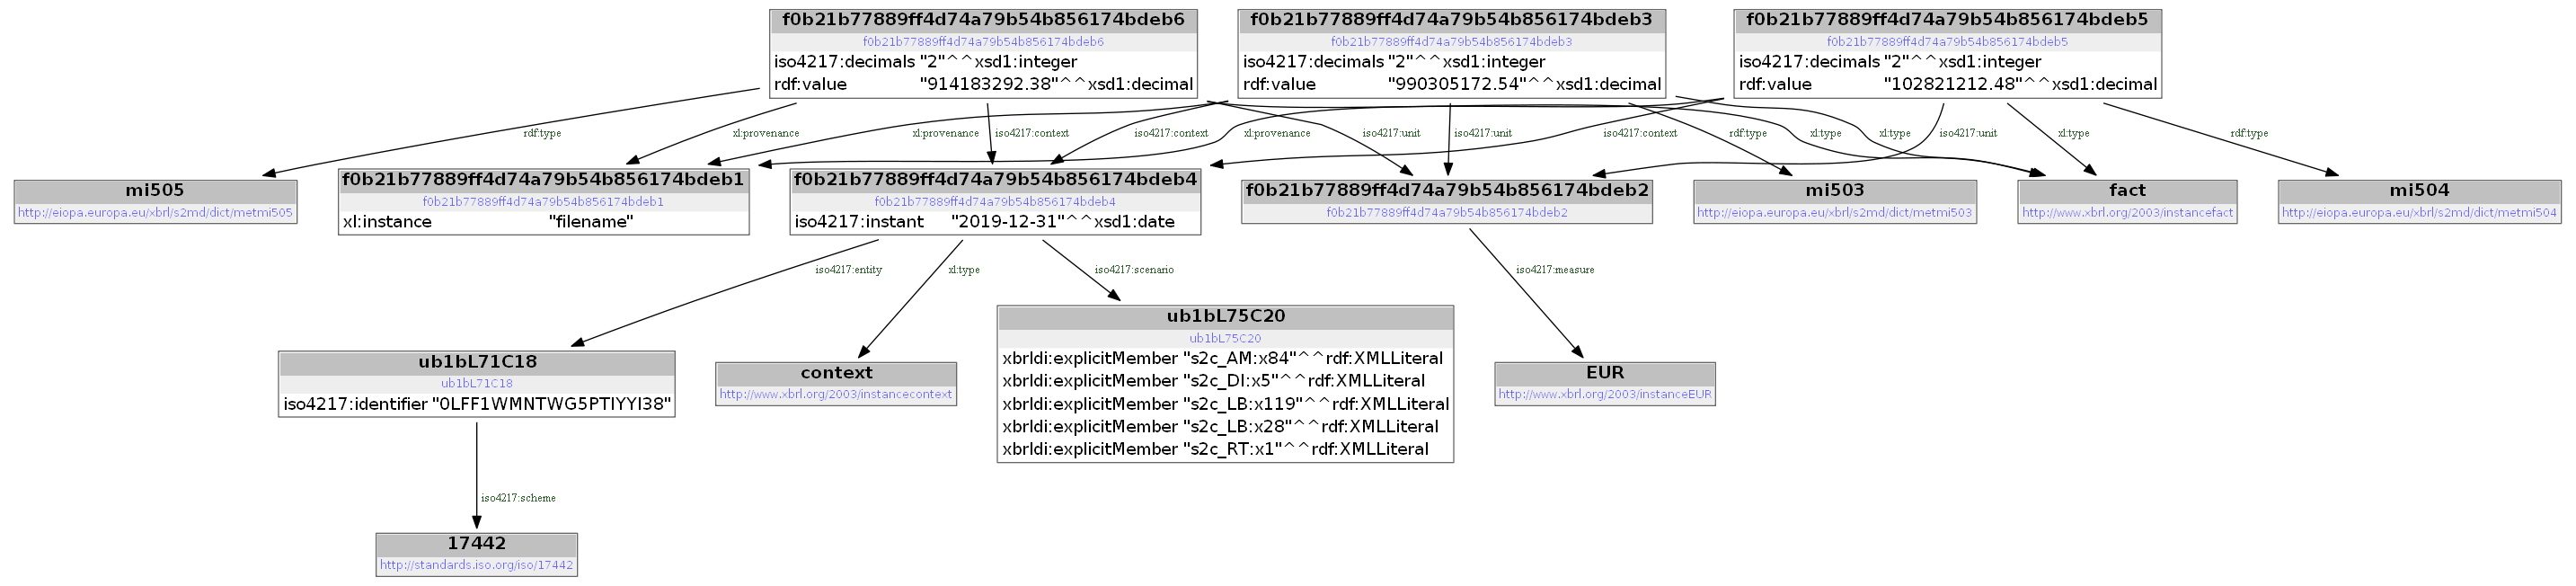

In [13]:
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

visualize(g)